<a href="https://colab.research.google.com/github/JManuelRG/cursopython/blob/main/2%20Uso%20de%20librer%C3%ADas/Tobera_de_Vapor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

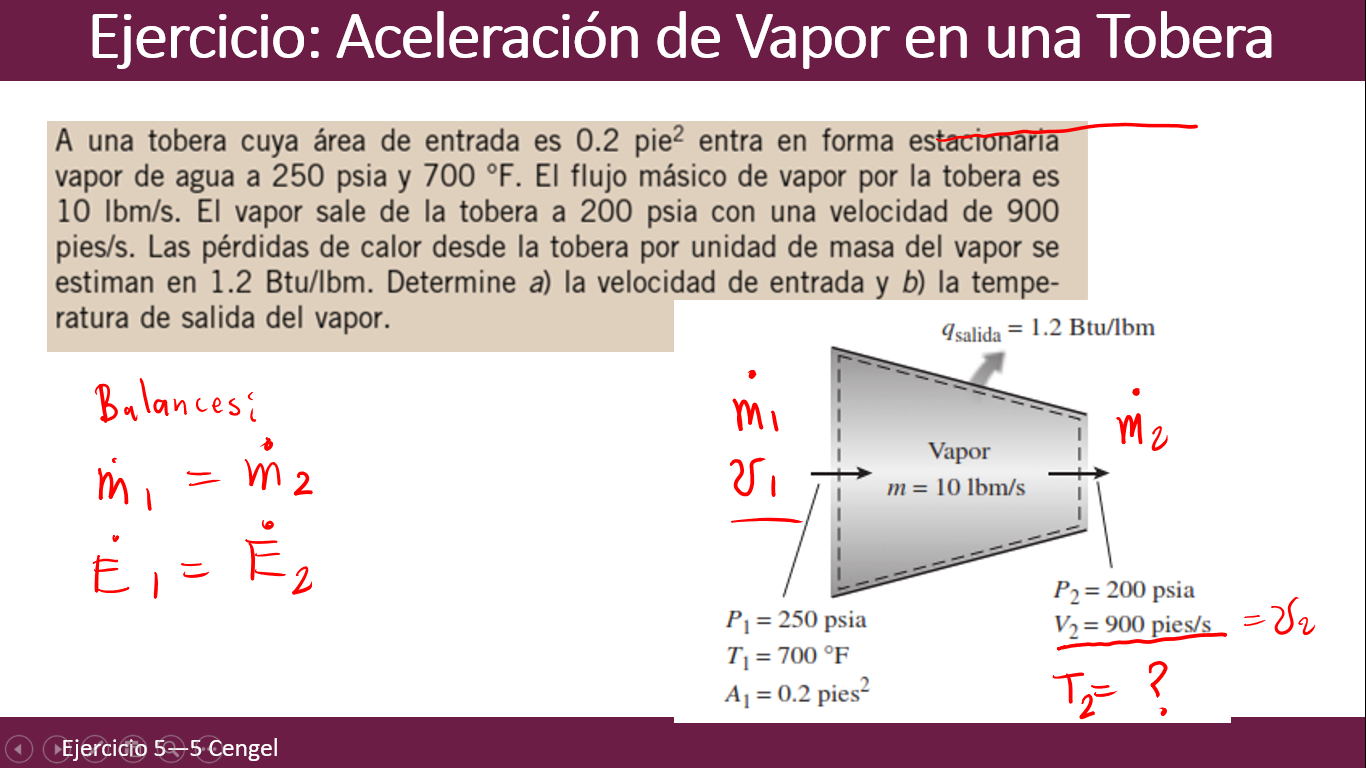

# 1. Planteamiento del Problema:
## Solución utilizando tablas de vapor:
https://www.youtube.com/watch?v=Pag4jhO0BWs

## 2. Solución utilizando Python (Explicación de este cuaderno)
https://youtu.be/TTzn-GEzTbs

## Blog del caso cde estudio completo:
https://basicosingenieria.blogspot.com/2022/04/tobera-vapor.html




# Determinar la temperatura de salida $$T_2$$
#de un flujo de vapor que circula a través de una tobera.
#La temperatura de entrada es de 700°F y la entalpía de salida es de:
#$$h_2=1354.4 \frac{BTU}{lb_m}$$
#$$h_1=1371.4 \frac{BTU}{lb_m}$$

#Ecuación:
#$$\Delta H= h_2-h_1=\int_{T_1}^{T_2}\frac{C_P}{R}RdT$$
#Sea:
#$$\frac{C_P}{R}=A+BT+CT^2+DT^{-2}$$


#De la tabla C1
#$$\frac{C_P}{R}=A+BT+CT^2+DT^{-2}$$
#$$\frac{C_P}{R}=3.47+1.45x10^{-3}T+0.121x10^5T^{-2}$$


In [ ]:
#Constantes del polinomio de Cp/R para el agua
A=3.47
B=1.45e-3
C=0
D=0.121e5

#Determinación de Cp: Sustituir el valor de la temperatura en Kelvin t multiplicar por R

$$Cp=R\frac{C_p}{R}=R({A+BT+CT^2+DT^{-2}})$$

In [ ]:
def CpR(T):
  return A+B*T+D*T**-2

In [ ]:
CpR(298)

4.03835512364308

In [ ]:
R=8.314 #J/molK
CpR(298)*R

33.57488449796857

#Planteamiento de la Ecuación:
#$$\Delta H= h_2-h_1=R\int_{T_1}^{T_2}\frac{C_P}{R}dT$$

#$$h_2-h_1=R\int_{T_1}^{T_2}3.47+1.45x10^{-3}T+0.121x10^5T^{-2}dT$$


#Transformación de Fahrenheit a Kelvin
#$$K=\left(\frac{°F-32}{1.8}\right)+273.15 K$$

In [ ]:
T1=(700-32)/1.8+273.15
print(f"Temperatura inicial= {T1} Kelvin")

Temperatura inicial= 644.2611111111111 Kelvin


# Análisis de Unidades

$$\frac{(1354.4-1371.4) \frac{BTU}{lbm}}{1.987 \frac{BTU}{lbmolR} (\frac{1 lbmol}{18.02 lbm})(\frac{1 R}{1°F})(\frac {1.8 °F}{1 K})} = \int_{T_1=644.26 K}^{T_2}3.47+1.45x10^{-3}T+0.121x10^5T^{-2}dT$$

In [ ]:
# Definir los valores de las variables
h2=1354.4 #BTU/lbm
h1=1371.4 #BTU/lbm
R=1.987 #BTU/lbmol°R

In [ ]:
# Importar librería de cálculo diferencial Sympy, en python
import sympy as sp
#Symbolic Python

In [ ]:
#Definir variables algebraicas:
T=sp.symbols('T') # Variable T para la integral de dT
T_2=sp.symbols('T_2') # Variable T2 (incógnita a encontrar)
display(T_2)

T_2

In [ ]:
print(h2)

1354.4


In [ ]:
# Almacenar el polinomio de Cp/R
CpR=A+B*T+D*T**-2
display(CpR) #Mostrar

0.00145*T + 3.47 + 12100.0/T**2

In [ ]:
# Almacenar Ecuación a Resolver incluyendo factor de conversión de °F a K
ecuacion = sp.Eq((h2-h1)/(R*1.8/18.02),sp.integrate(CpR,(T,644.3,T_2)))
display(ecuacion)

Eq(-85.6511770955656, 0.000725*T_2**2 + 3.47*T_2 - 2517.90473385469 - 12100.0/T_2)

In [ ]:
solucion=sp.solve(ecuacion,T_2)
print(solucion)

[-5406.18981743595 + 0.e-20*I, -4.94003013970405 + 0.e-19*I, 624.92295102393 - 0.e-19*I]


In [ ]:
print(f"La temperatura final es: {solucion[2]} K")
print(f"La temperatura final es: 665°F")

La temperatura final es: 624.92295102393 - 0.e-19*I K
La temperatura final es: 665°F


In [ ]:
solucion

[-5406.18981743595 + 0.e-20*I,
 -4.94003013970405 + 0.e-19*I,
 624.92295102393 - 0.e-19*I]